## Breast Cancer Analysis Model

## 1. Overview of problem statement

Classification of Breast Cancer data by dimension, symmetry, errors

## 2. Objective

To classify the Breast Cancer data using Machine Learning techniques

## 3. Data description


Source: breast_cancer(), scikit learn datasets
Features:
 #   Column                   Non-Null Count  Dtype 
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         569 non-null    float64
 15  compactness error        569 non-null    float64
 16  concavity error          569 non-null    float64
 17  concave points error     569 non-null    float64
 18  symmetry error           569 non-null    float64
 19  fractal dimension error  569 non-null    float64
 20  worst radius             569 non-null    float64
 21  worst texture            569 non-null    float64
 22  worst perimeter          569 non-null    float64
 23  worst area               569 non-null    float64
 24  worst smoothness         569 non-null    float64
 25  worst compactness        569 non-null    float64
 26  worst concavity          569 non-null    float64
 27  worst concave points     569 non-null    float64
 28  worst symmetry           569 non-null    float64
 29  worst fractal dimension  569 non-null    float6464
   569 non-null    int32  


## 4. Data collection

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

## 5. Data preprocessing and data cleaning

In [4]:
X.shape

(569, 30)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
print(X.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [7]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [8]:
X.duplicated().sum()

0

### 5.1 Outlier Detection using IQR method

In [3]:
def detect_outliers(df): 
    outliers_dict = {} 
    for column in df.columns: 
        Q1 = df[column].quantile(0.25) 
        Q3 = df[column].quantile(0.75) 
        IQR = Q3 - Q1 
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR 
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column] 
        outliers_dict[column] = len(outliers)

    return pd.Series(outliers_dict)
outliers_count = detect_outliers(X) 
print("\nNumber of outliers in each feature:") 
print(outliers_count)


Number of outliers in each feature:
mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
dtype: int64


In [9]:
y.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

In [10]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: None
Non-Null Count  Dtype
--------------  -----
569 non-null    int32
dtypes: int32(1)
memory usage: 2.4 KB


In [11]:
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [12]:
print('q1 = ',q1)
print('q3 = ',q3)
print('iqr = ',iqr)

q1 =  0.0
q3 =  1.0
iqr =  1.0


There is no null values or duplicates, so no need to clean the data. The dataset is very small and it
dimensional parameters, so we are avoiding the outlier removal step.

## 6. Exploratory data analysis

### 6.1 Distribution plots for all features

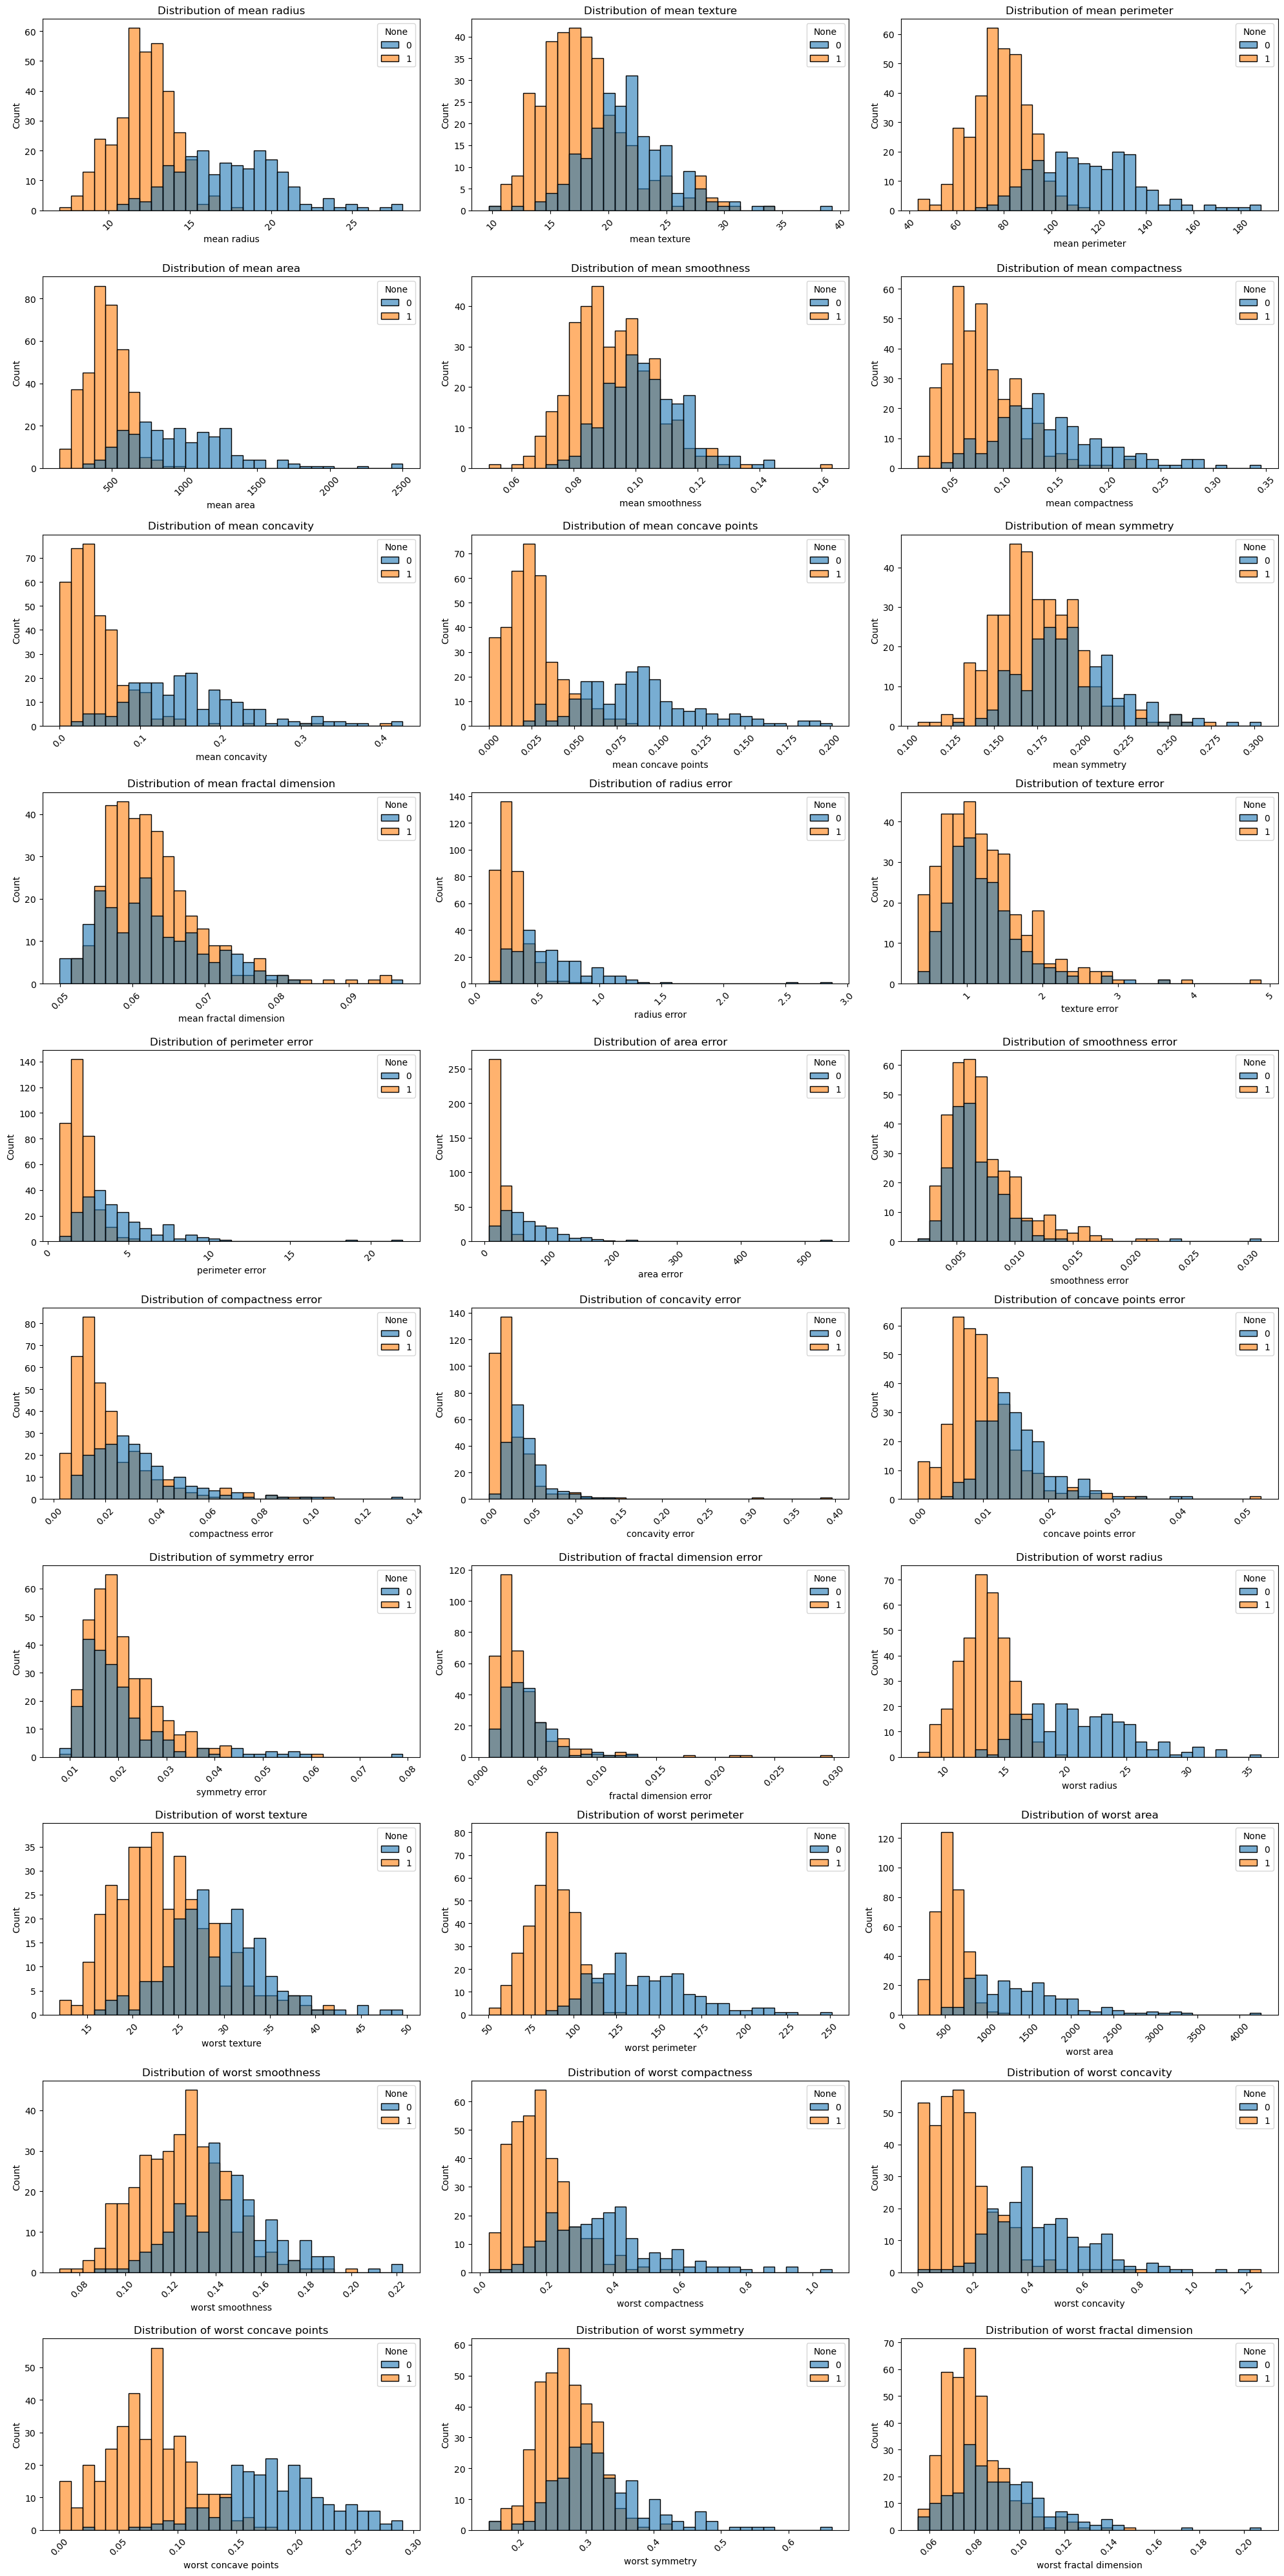

In [13]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(X.columns, 1):
    plt.subplot(10, 3, i)
    sns.histplot(data=X, x=column, hue=y, bins=30, alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.2 Box plots to visualize outliers

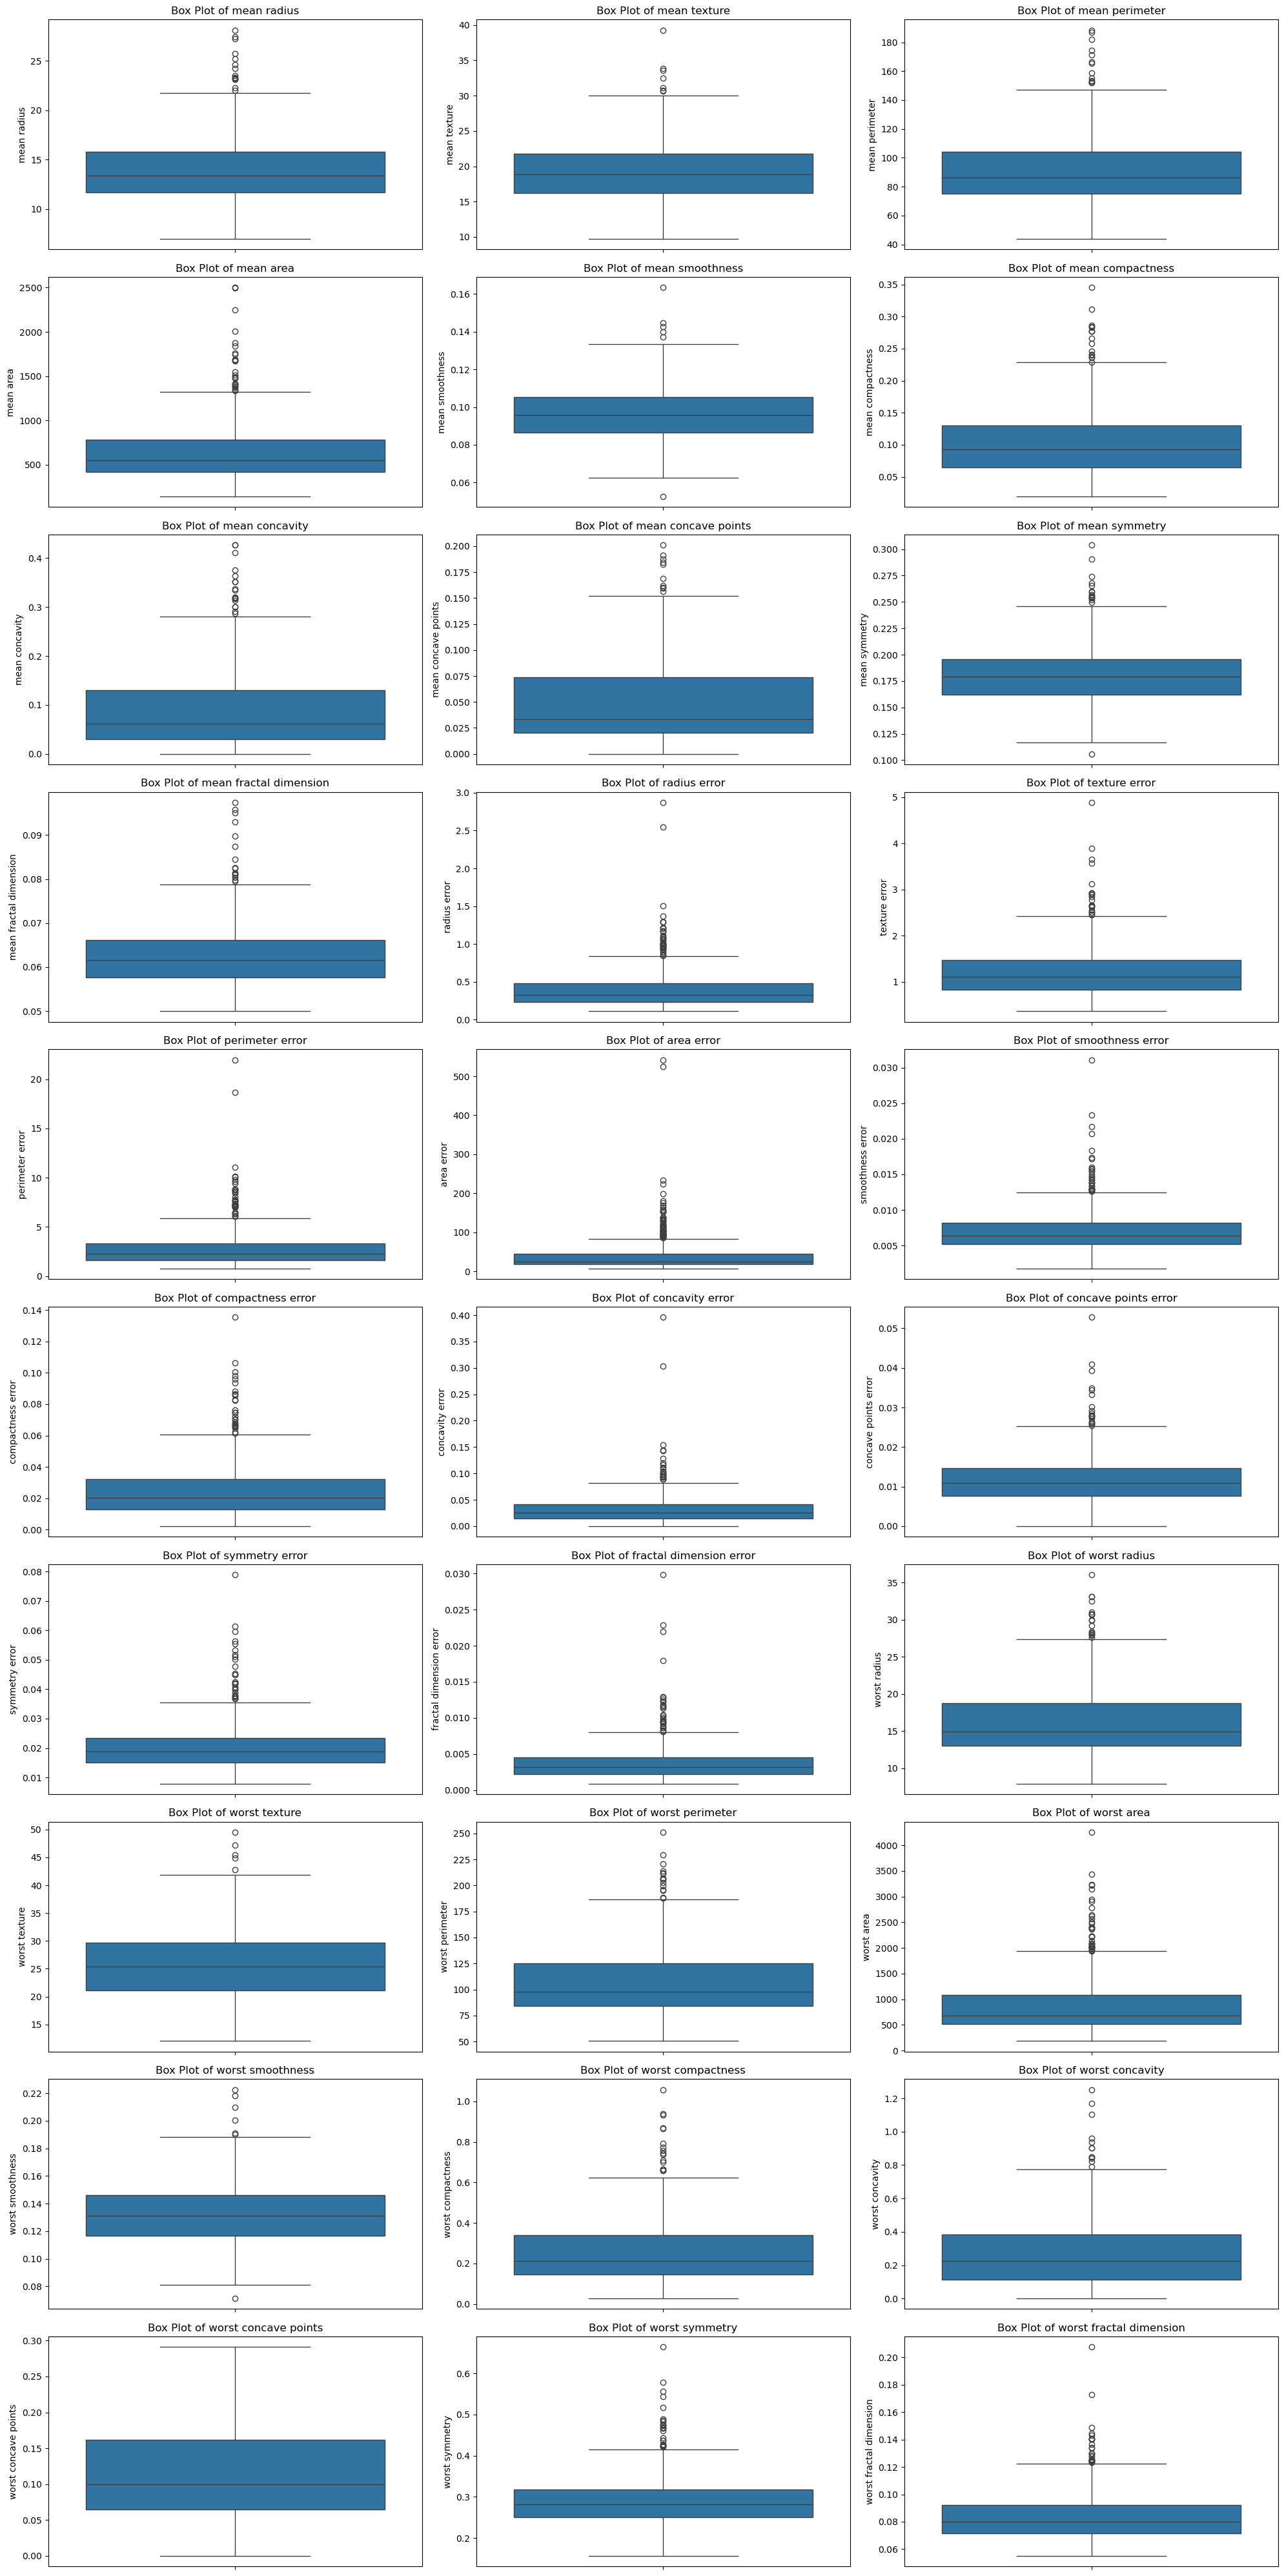

In [14]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(X.columns, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(data=X, y=column)
    plt.title(f'Box Plot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.3 Correlation Matrix

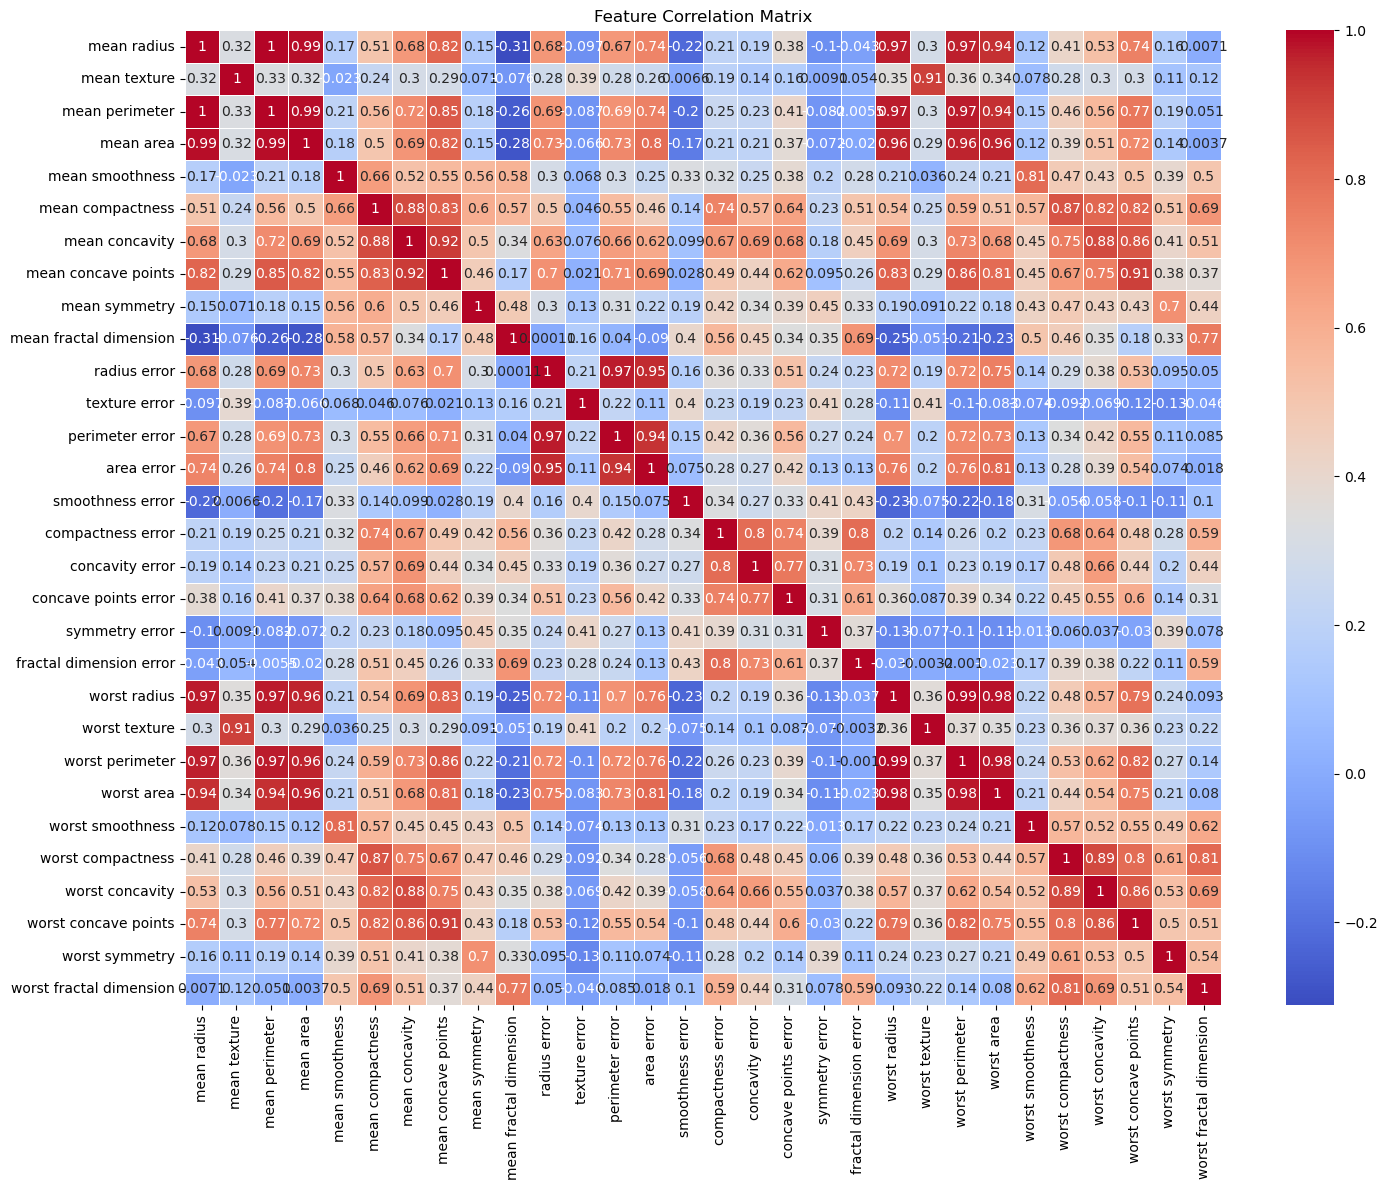

In [15]:
plt.figure(figsize=(15, 12))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

### 6.4 Violin plots for feature distributions by class

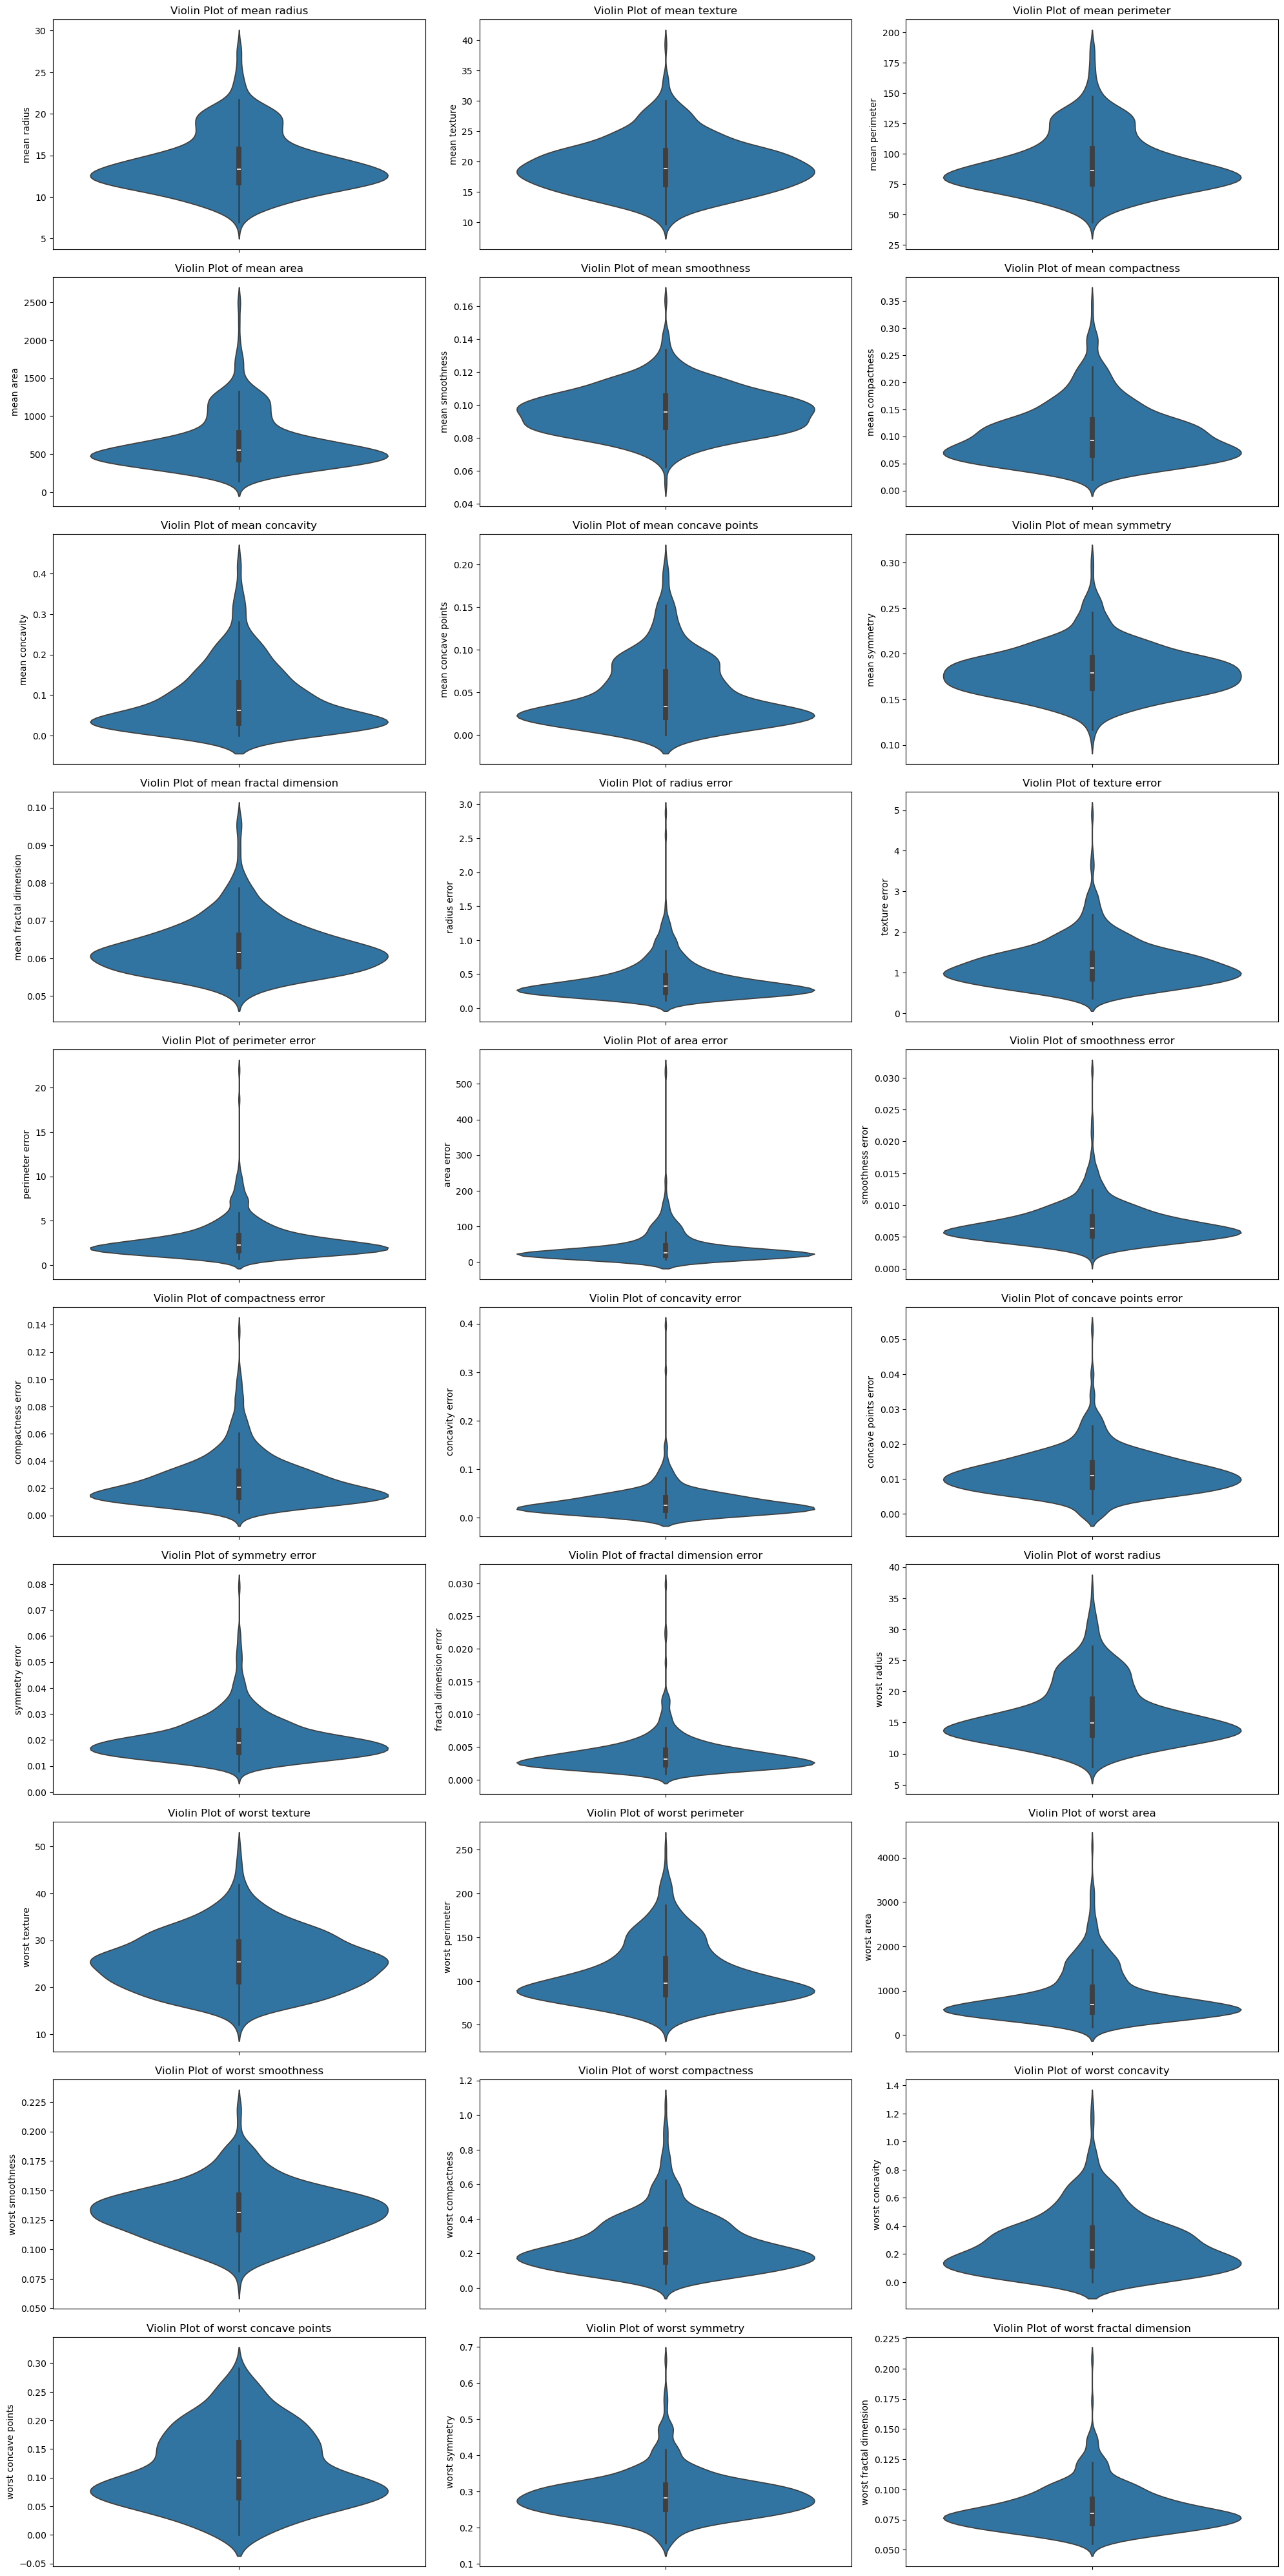

In [16]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(X.columns, 1):
    plt.subplot(10, 3, i)
    sns.violinplot(data=pd.DataFrame(X[column]), y=column)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()

## 7. Feature engineering

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Here all the columns have numerical values, so we dont need to perform Encoding process (converting categorical values
to numerical values)

## 8. Feature selection

### 8.1. Using SelectkBest

In [7]:
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X,y)
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask].tolist()

In [5]:
selected_features

['mean radius',
 'mean perimeter',
 'mean area',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'radius error',
 'perimeter error',
 'area error',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst compactness',
 'worst concavity',
 'worst concave points']

## 9. Split data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## 10. Feature scaling

### 10.1. Scaling using Standard Scaler

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 11. Build the ML model

Here we are using five different classification algorithms to find the different aspects of this
classification data and from this we can choose the best model which gives high accuracy. 

1) Decision Tree Regression - Finds each and every possible chances of making decisions and evaluate.
2) K Nearest Neighbors - Finds which class has the most number of neighbors and the test value belongs to that class. 
3) Logistic Regression - It is adaptable for binary and multi-class classification problems, predicts the probability that an instance                                belongs to a given class or not.
4) Random Forest Classifier - It uses multiple decision trees to classify data.
5) Support Vector Machine - Helps to create the best decision boundary that can segragate n-dimensional space into classes.

### 11.1. Decision Tree Classifier

In [10]:
dt_model = DecisionTreeClassifier(random_state = 42, max_depth = 5)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [11]:
dt_ypred = dt_model.predict(X_test_scaled)
dt_ypred_proba = dt_model.predict_proba(X_test_scaled)[:, 1]
dt_ypred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

### 11.2. K Nearest Neighbors

In [12]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [13]:
knn_ypred = knn_model.predict(X_test_scaled)
knn_ypred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]
knn_ypred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

### 11.3. Logistic Regression

In [14]:
lr_model = LogisticRegression(random_state = 42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [15]:
lr_ypred = lr_model.predict(X_test_scaled)
lr_ypred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
lr_ypred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

### 11.4. Random Forest Classifier

In [16]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [17]:
rf_ypred = rf_model.predict(X_test_scaled)
rf_ypred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_ypred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

### 11.5. Support Vector Machine

In [18]:
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [19]:
svm_ypred = svm_model.predict(X_test_scaled)
svm_ypred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
svm_ypred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

## 12. Model Evaluation

### Classification Metrics

In [20]:
print("\nDecision Tree Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, dt_ypred))
print("Precision:", precision_score(y_test, dt_ypred))
print("Recall:", recall_score(y_test, dt_ypred))
print("F1 Score:", f1_score(y_test, dt_ypred))
print("ROC AUC Score:", roc_auc_score(y_test, dt_ypred_proba))


Decision Tree Classifier Metrics:
Accuracy: 0.9385964912280702
Precision: 0.9324324324324325
Recall: 0.971830985915493
F1 Score: 0.9517241379310345
ROC AUC Score: 0.966590239109073


In [21]:
print("\nKNN Metrics:")
print("Accuracy:", accuracy_score(y_test, knn_ypred))
print("Precision:", precision_score(y_test, knn_ypred))
print("Recall:", recall_score(y_test, knn_ypred))
print("F1 Score:", f1_score(y_test, knn_ypred))
print("ROC AUC Score:", roc_auc_score(y_test, knn_ypred_proba))


KNN Metrics:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
ROC AUC Score: 0.9980347199475925


In [22]:
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, lr_ypred))
print("Precision:", precision_score(y_test, lr_ypred))
print("Recall:", recall_score(y_test, lr_ypred))
print("F1 Score:", f1_score(y_test, lr_ypred))
print("ROC AUC Score:", roc_auc_score(y_test, lr_ypred_proba))


Logistic Regression Metrics:
Accuracy: 0.9736842105263158
Precision: 0.9594594594594594
Recall: 1.0
F1 Score: 0.9793103448275862
ROC AUC Score: 0.998689813298395


In [23]:
print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_ypred))
print("Precision:", precision_score(y_test, rf_ypred))
print("Recall:", recall_score(y_test, rf_ypred))
print("F1 Score:", f1_score(y_test, rf_ypred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_ypred_proba))


Random Forest Classifier Metrics:
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965
ROC AUC Score: 0.9967245332459875


In [24]:
print("\nSVM Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_ypred))
print("Precision:", precision_score(y_test, svm_ypred))
print("Recall:", recall_score(y_test, svm_ypred))
print("F1 Score:", f1_score(y_test, svm_ypred))
print("ROC AUC Score:", roc_auc_score(y_test, svm_ypred_proba))


SVM Metrics:
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793104
ROC AUC Score: 0.9983622666229939


### Classification Report

In [37]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_ypred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [38]:
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_ypred))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [39]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_ypred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [40]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, lr_ypred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [41]:
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_ypred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## 13. Hyperparameter Tuning

Here Logistic Regression Classification gives more Accuracy (0.97) than any other models.
Now apply the hyperparameter tuning using GridSearchCV.

In [20]:
param_grid = [{
    'penalty':['l1','l2','elasticnet','none'],
    'C':np.logspace(-4,4,20),
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter':[100,1000,2500,5000]
}]


In [21]:
clf = GridSearchCV(lr_model, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)

In [22]:
clf

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [23]:
best_clf = clf.fit(X_train_scaled, y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


LogisticRegression(C=4.281332398719396, random_state=42, solver='sag')

In [24]:
print(f'Accuracy: {best_clf.score(X_train_scaled, y_train):.3f}')

Accuracy: 0.956


Here after hyperparameter tuning the Accuracy score gets reduced, so we can choose the
model without tuning.

## 14. Save the model

In [25]:
joblib.dump(lr_model, 'ML classification_Breast_Cancer_Model.joblib')

['ML classification_Breast_Cancer_Model.joblib']